- Module Title: Machine Learning For AI
- Assessment Title: ML_CA1
- Lecturer Name: David McQuaid
- Student Full Name: Caroline de Sa Teixeira
- Student Number: 2020331
- Assessment Due Date: 25/03/2024
- Date of Submission: 22/04/2024

##### Github link: https://github.com/carolinedesat/ML_CA1

# 1. Libraries and Dataset

The following code will import all the necessary libraries and the log2.csv dataset.

In [595]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [596]:
df = pd.read_csv('log2.csv', header=0)

By displaying the first 10 rows, shape and info we can see that the dataset contains 12 columns (Source Port, Destination Port, NAT Source Port, NAT Destination Port, Bytes, Bytes Sent, Bytes Received, Packets, Elapsed Time (sec), pkts_sent, pkts_received and Action). Apart from the Action column which is of type object, all the other values are of type integer. We can also see that log2.csv contains a total of 65532 rows.

In [597]:
df.head(10)

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received,Action
0,57222,53,54587,53,177,94,83,2,30,1,1,allow
1,56258,3389,56258,3389,4768,1600,3168,19,17,10,9,allow
2,6881,50321,43265,50321,238,118,120,2,1199,1,1,allow
3,50553,3389,50553,3389,3327,1438,1889,15,17,8,7,allow
4,50002,443,45848,443,25358,6778,18580,31,16,13,18,allow
5,51465,443,39975,443,3961,1595,2366,21,16,12,9,allow
6,60513,47094,45469,47094,320,140,180,6,7,3,3,allow
7,50049,443,21285,443,7912,3269,4643,23,96,12,11,allow
8,52244,58774,2211,58774,70,70,0,1,5,1,0,allow
9,50627,443,16215,443,8256,1674,6582,31,75,15,16,allow


In [598]:
df.shape

(65532, 12)

In [599]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65532 entries, 0 to 65531
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Source Port           65532 non-null  int64 
 1   Destination Port      65532 non-null  int64 
 2   NAT Source Port       65532 non-null  int64 
 3   NAT Destination Port  65532 non-null  int64 
 4   Bytes                 65532 non-null  int64 
 5   Bytes Sent            65532 non-null  int64 
 6   Bytes Received        65532 non-null  int64 
 7   Packets               65532 non-null  int64 
 8   Elapsed Time (sec)    65532 non-null  int64 
 9   pkts_sent             65532 non-null  int64 
 10  pkts_received         65532 non-null  int64 
 11  Action                65532 non-null  object
dtypes: int64(11), object(1)
memory usage: 6.0+ MB


The nunique method displays all the unique values in each column, and by getting the sum of all the nulls we can see that we don't have any null values in the dataset.

In [600]:
df.nunique()

Source Port             22724
Destination Port         3273
NAT Source Port         29152
NAT Destination Port     2533
Bytes                   10724
Bytes Sent               6683
Bytes Received           8814
Packets                  1116
Elapsed Time (sec)        915
pkts_sent                 749
pkts_received             922
Action                      4
dtype: int64

In [601]:
df.isnull().sum()

Source Port             0
Destination Port        0
NAT Source Port         0
NAT Destination Port    0
Bytes                   0
Bytes Sent              0
Bytes Received          0
Packets                 0
Elapsed Time (sec)      0
pkts_sent               0
pkts_received           0
Action                  0
dtype: int64

# 1. EDA
##### Perform an initial analysis of the data (EDA) using python in your Jupyter notebook. Discuss your findings and what relevance they might have on your planned classification algorithms. [0-20]

In [602]:
df.describe()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
count,65532.000000,65532.000000,65532.000000,65532.000000,6.553200e+04,6.553200e+04,6.553200e+04,6.553200e+04,65532.000000,65532.000000,65532.000000
mean,49391.969343,10577.385812,19282.972761,2671.049930,9.712395e+04,2.238580e+04,7.473815e+04,1.028660e+02,65.833577,41.399530,61.466505
std,15255.712537,18466.027039,21970.689669,9739.162278,5.618439e+06,3.828139e+06,2.463208e+06,5.133002e+03,302.461762,3218.871288,2223.332271
min,0.000000,0.000000,0.000000,0.000000,6.000000e+01,6.000000e+01,0.000000e+00,1.000000e+00,0.000000,1.000000,0.000000
25%,49183.000000,80.000000,0.000000,0.000000,6.600000e+01,6.600000e+01,0.000000e+00,1.000000e+00,0.000000,1.000000,0.000000
50%,53776.500000,445.000000,8820.500000,53.000000,1.680000e+02,9.000000e+01,7.900000e+01,2.000000e+00,15.000000,1.000000,1.000000
75%,58638.000000,15000.000000,38366.250000,443.000000,7.522500e+02,2.100000e+02,4.490000e+02,6.000000e+00,30.000000,3.000000,2.000000
max,65534.000000,65535.000000,65535.000000,65535.000000,1.269359e+09,9.484772e+08,3.208818e+08,1.036116e+06,10824.000000,747520.000000,327208.000000


##### The following plot indicates that the number of "allow" actions is significantly higher compared to "drop", "deny" and "reset-both" actions. Reset-both is very rare when compared to the other action types ans this causes an imbalanced dataset.

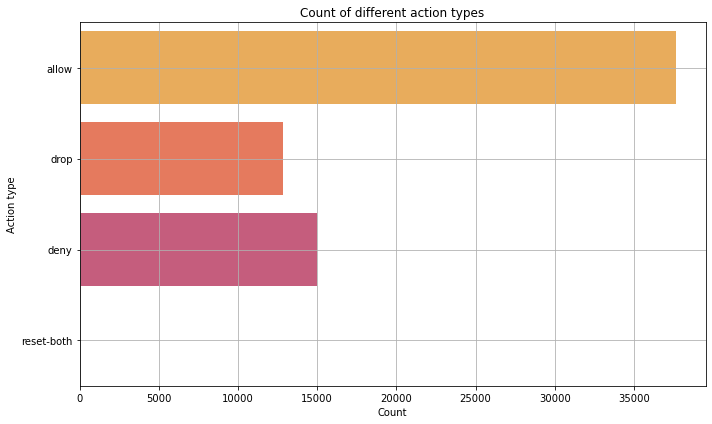

allow         37640
deny          14987
drop          12851
reset-both       54
Name: Action, dtype: int64

In [603]:
palette = ["#FFAF45", "#FB6D48", "#D74B76", "#673F69"]
plt.figure(figsize=(10, 6))

sns.countplot(data=df, y='Action', palette=palette)
plt.title('Count of different action types')
plt.ylabel('Action type')
plt.xlabel('Count')
plt.grid(True)
plt.tight_layout()
plt.show()

df['Action'].value_counts()

##### This plot illustrates the difference between deny, drop, allow and reset-both actions, revealing a significant contrast when compared to the first plot, where allow actions constitute the majority when analyzing the entire dataset. In this comparisson, deny and drop stand out.

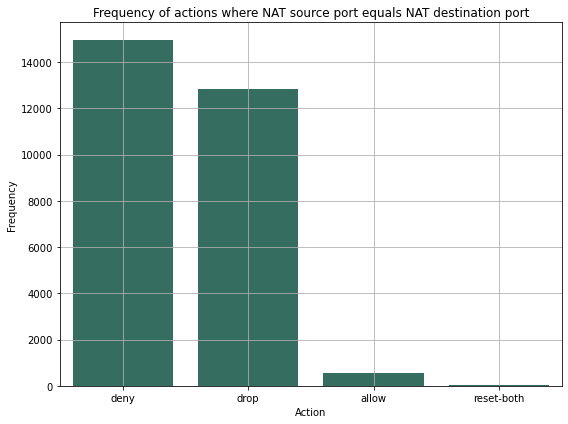

In [604]:
same_ports = df[df['NAT Source Port'] == df['NAT Destination Port']]
unique_actions = same_ports['Action'].value_counts()
plt.figure(figsize=(8, 6))

sns.barplot(x=unique_actions.index, y=unique_actions.values, color='#2C7865')
plt.xlabel('Action')
plt.ylabel('Frequency')
plt.title('Frequency of actions where NAT source port equals NAT destination port')
plt.grid(True)
plt.tight_layout()
plt.show()

##### The code below reveals that 28432 out of the 65532 rows contain the same NAT address for both the source and destination ports. And when comparing with the code above we can see that in ALL cases where the NAT source and destination are the same, it indicates that a denied and/or dropped packet was returned from the gate and sent back to its origin. That explains why only 564 rows belong to the "allow" action. 

In [605]:
nat_allow = len(df[(df['NAT Source Port'] == df['NAT Destination Port']) & (df['Action'] == 'allow')])
nat_deny = len(df[(df['NAT Source Port'] == df['NAT Destination Port']) & (df['Action'] == 'deny')])
nat_drop = len(df[(df['NAT Source Port'] == df['NAT Destination Port']) & (df['Action'] == 'drop')])
nat_reset_both = len(df[(df['NAT Source Port'] == df['NAT Destination Port']) & (df['Action'] == 'reset-both')])

print("Allow: ", nat_allow)
print("Deny: ", nat_deny)
print("Drop: ", nat_drop)
print("Reset-both: ", nat_reset_both)

Allow:  564
Deny:  14975
Drop:  12851
Reset-both:  42


##### Something similar happens when examining the Source Port and Destination Port columns. The allow action is still high in the Source Port column, but the distribution of other values appears to be more balanced. The number of drop actions is even higher than the allow actions, and the reset-both remains lower than all the other actions but shows a more balanced distribution compared to all other plots.

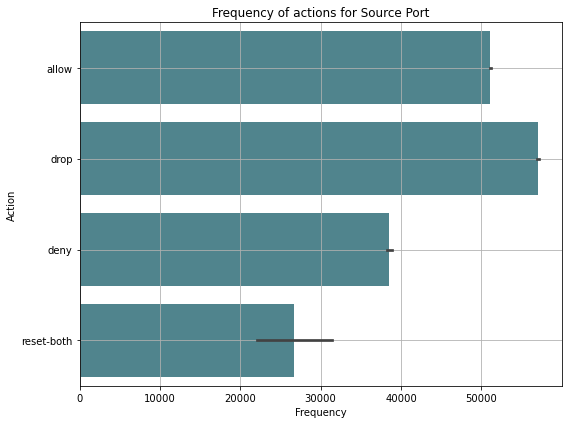

In [606]:
plt.figure(figsize=(8, 6))

sns.barplot(x=df['Source Port'], y=df['Action'], color='#468B97')
plt.xlabel('Frequency')
plt.ylabel('Action')
plt.title('Frequency of actions for Source Port')
plt.grid(True)
plt.tight_layout()
plt.show()

##### When it comes to the Destination Port columns, we can see that the number of records with the values deny and reset-both are more prominent than allow, which is very low. Drop is almost insignificant.

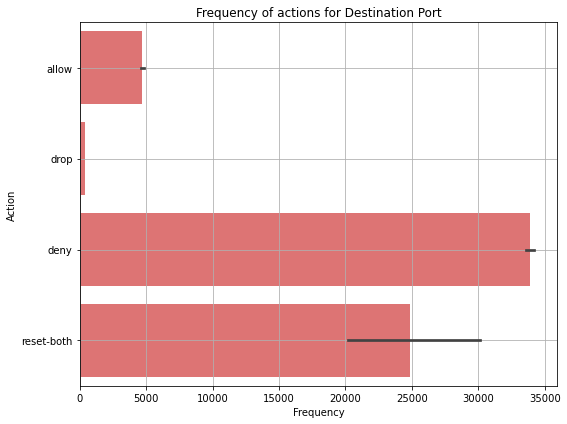

In [607]:
plt.figure(figsize=(8, 6))

sns.barplot(x=df['Destination Port'], y=df['Action'], color='#EF6262')
plt.xlabel('Frequency')
plt.ylabel('Action')
plt.title('Frequency of actions for Destination Port')
plt.grid(True)
plt.tight_layout()
plt.show()

##### In the following set of plots, we can see that the allow action occurs significantly more frequently than all the other categories, rendering them almost insignificant. That means that the source port, destination port, NAT source port, and destination source port are the only columns that differ from this pattern.

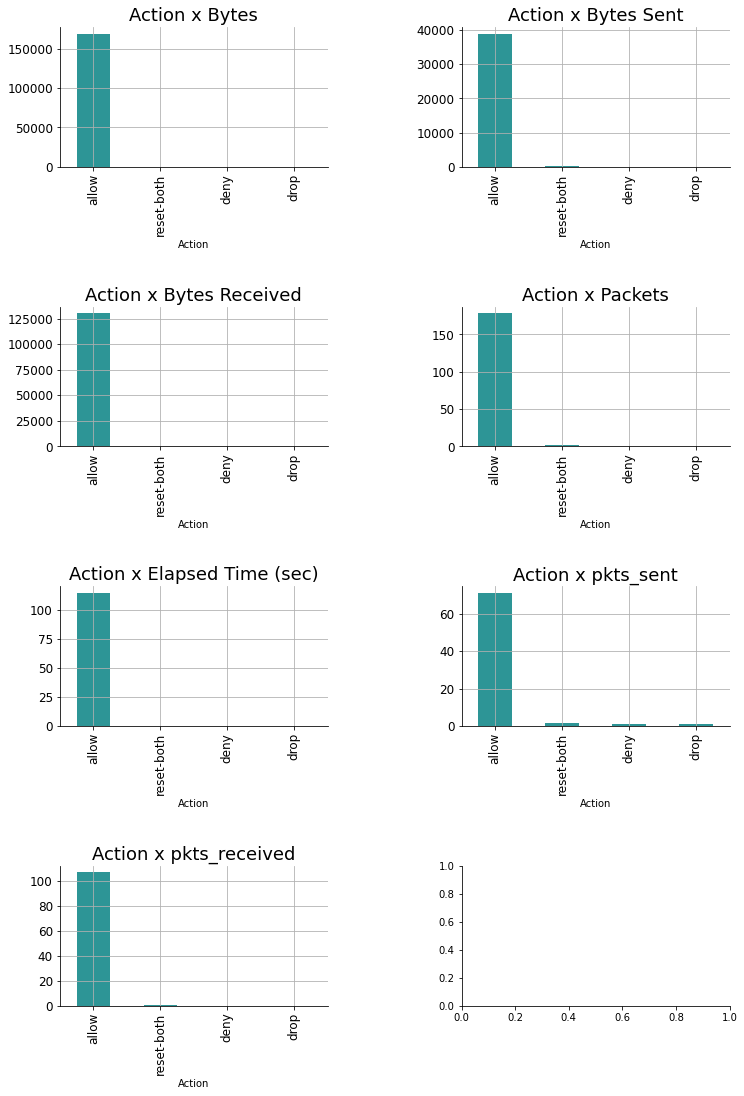

In [608]:
palette = '#2D9596'
fig, axarr = plt.subplots(4, 2, figsize=(12, 18))

df.groupby('Action')['Bytes'].mean().sort_values(ascending=False).plot.bar(ax=axarr[0][0], fontsize=12, color=palette)
axarr[0][0].set_title("Action x Bytes", fontsize=18)
axarr[0][0].grid(True)

df.groupby('Action')['Bytes Sent'].mean().sort_values(ascending=False).plot.bar(ax=axarr[0][1], fontsize=12, color=palette)
axarr[0][1].set_title("Action x Bytes Sent", fontsize=18)
axarr[0][1].grid(True)

df.groupby('Action')['Bytes Received'].mean().sort_values(ascending=False).head(10).plot.bar(ax=axarr[1][0], fontsize=12, color=palette)
axarr[1][0].set_title("Action x Bytes Received", fontsize=18)
axarr[1][0].grid(True)

df.groupby('Action')['Packets'].mean().sort_values(ascending=False).head(10).plot.bar(ax=axarr[1][1], fontsize=12, color=palette)
axarr[1][1].set_title("Action x Packets", fontsize=18)
axarr[1][1].grid(True)

df.groupby('Action')['Elapsed Time (sec)'].mean().sort_values(ascending=False).plot.bar(ax=axarr[2][0], fontsize=12, color=palette)
axarr[2][0].set_title("Action x Elapsed Time (sec)", fontsize=18)
axarr[2][0].grid(True)

df.groupby('Action')['pkts_sent'].mean().sort_values(ascending=False).plot.bar(ax=axarr[2][1], fontsize=12, color=palette)
axarr[2][1].set_title("Action x pkts_sent", fontsize=18)
axarr[2][1].grid(True)

df.groupby('Action')['pkts_received'].mean().sort_values(ascending=False).plot.bar(ax=axarr[3][0], fontsize=12, color=palette)
axarr[3][0].set_title("Action x pkts_received", fontsize=18)
axarr[3][0].grid(True)

plt.subplots_adjust(hspace=1.0)
plt.subplots_adjust(wspace=.5)
sns.despine()

# 2. Data Preparation
##### Perform any preparation of the data, that you feel is necessary, using python in your Jupyter notebook. Explain your rationale behind your data preparation and how it will assist you.[0-30]

### MinMaxScaler
##### Use MinMaxScaler to normalize all the numeric features, ensuring they are on a relatively similar scale. This is done by subtracting the minimum value in each feature and then dividing by the range, which is the difference between the maximum and minimum values in the feature. MinMaxScaler preserves the shape of the original distribution while addressing the issues identified in all the EDA plots, ensuring that all features are on a similar scale and avoiding creating bias when training our dataset.

In [609]:
numerical_columns = ['Source Port', 'Destination Port', 'NAT Source Port', 'NAT Destination Port', 
                     'Bytes', 'Bytes Sent', 'Bytes Received', 'Packets', 'Elapsed Time (sec)', 
                     'pkts_sent', 'pkts_received']

min_max_scaler = MinMaxScaler()

df[numerical_columns] = min_max_scaler.fit_transform(df[numerical_columns])
df[numerical_columns] = standard_scaler.fit_transform(df[numerical_columns])

In [610]:
df.head()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received,Action
0,0.513256,-0.569937,1.606882,-0.268819,-0.017255,-0.005823,-0.030308,-0.019651,-0.118474,-0.012551,-0.027197,allow
1,0.450066,-0.389279,1.682938,0.073718,-0.016438,-0.005430,-0.029056,-0.016339,-0.161455,-0.009755,-0.023598,allow
2,-2.786582,2.152272,1.091555,4.892650,-0.017244,-0.005817,-0.030293,-0.019651,3.746507,-0.012551,-0.027197,allow
3,0.076105,-0.389279,1.423272,0.073718,-0.016695,-0.005472,-0.029575,-0.017118,-0.161455,-0.010376,-0.024498,allow
4,0.039987,-0.548817,1.209121,-0.228774,-0.012773,-0.004077,-0.022799,-0.014001,-0.164761,-0.008823,-0.019550,allow


### One-Hot Encoding
##### Use One-Hot Encoding to transform the "Action" column into four different columns containing binary data. This is done in order to turn categorical variables into numeric values. If the action value is equal to "allow", the "Action_allow" column will contain the value 1. If the action is another one that is not "allow," the column will contain the value 0. This works for all the other action columns, meaning that only one of the four of them will contain the value 1.

In [611]:
df_encoded = pd.get_dummies(df, columns = ['Action'])
df_encoded.head()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received,Action_allow,Action_deny,Action_drop,Action_reset-both
0,0.513256,-0.569937,1.606882,-0.268819,-0.017255,-0.005823,-0.030308,-0.019651,-0.118474,-0.012551,-0.027197,1,0,0,0
1,0.450066,-0.389279,1.682938,0.073718,-0.016438,-0.005430,-0.029056,-0.016339,-0.161455,-0.009755,-0.023598,1,0,0,0
2,-2.786582,2.152272,1.091555,4.892650,-0.017244,-0.005817,-0.030293,-0.019651,3.746507,-0.012551,-0.027197,1,0,0,0
3,0.076105,-0.389279,1.423272,0.073718,-0.016695,-0.005472,-0.029575,-0.017118,-0.161455,-0.010376,-0.024498,1,0,0,0
4,0.039987,-0.548817,1.209121,-0.228774,-0.012773,-0.004077,-0.022799,-0.014001,-0.164761,-0.008823,-0.019550,1,0,0,0


In [612]:
action_columns = ['Action_allow', 'Action_deny', 'Action_drop', 'Action_reset-both']

In [613]:
X = df_encoded.drop(action_columns, axis=1)

X.head()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
0,0.513256,-0.569937,1.606882,-0.268819,-0.017255,-0.005823,-0.030308,-0.019651,-0.118474,-0.012551,-0.027197
1,0.450066,-0.389279,1.682938,0.073718,-0.016438,-0.005430,-0.029056,-0.016339,-0.161455,-0.009755,-0.023598
2,-2.786582,2.152272,1.091555,4.892650,-0.017244,-0.005817,-0.030293,-0.019651,3.746507,-0.012551,-0.027197
3,0.076105,-0.389279,1.423272,0.073718,-0.016695,-0.005472,-0.029575,-0.017118,-0.161455,-0.010376,-0.024498
4,0.039987,-0.548817,1.209121,-0.228774,-0.012773,-0.004077,-0.022799,-0.014001,-0.164761,-0.008823,-0.019550


In [614]:
y = df_encoded[action_columns]

y.head(10)

,Action_allow,Action_deny,Action_drop,Action_reset-both
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
5,1,0,0,0
6,1,0,0,0
7,1,0,0,0
8,1,0,0,0
9,1,0,0,0


In [615]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [616]:
print("X_train: ", X_train.shape) 
print("y_train: ", y_train.shape) 
print("X_test: ", X_test.shape) 
print("y_test: ", y_test.shape) 

X_train:  (45872, 11)
y_train:  (45872, 4)
X_test:  (19660, 11)
y_test:  (19660, 4)


# 3. Classification Algorithms
#####  Create and implement at least 2 classification algorithms that will output a classification based on the Country: (class attribute) feature. Test these models and try to improve it as you see fit. Discuss your findings and final rational for choosing a particular classification algorithm.[0-40]

# 4. Test Data
##### Make a classification using your test data, using your final classification algorithm and comment on the accuracy differential between the training and testing set.[0-10]

# 5. Referencing

- Benie, P. (no date) Drop versus Reject. Available at: https://www.chiark.greenend.org.uk/~peterb/network/drop-vs-reject#:~:text=When%20a%20packet%20reaches%20the,ALLOW%20(aka%20ACCEPT) (Accessed: 25 March 2024).

- Mahadevan, M. (2024) Step-by-Step Exploratory Data Analysis (EDA) using Python, Analytics Vidhya. Available at: https://www.analyticsvidhya.com/blog/2022/07/step-by-step-exploratory-data-analysis-eda-using-python/ (Accessed: 25 March 2024).

- Follow meAjitesh KumarI have been recently working in the area of Data analytics including Data Science and Machine Learning / Deep Learning. I am also passionate about different technologies including programming languages such as Java/JEE (2023) MinMaxScaler vs StandardScaler - Python Examples, Analytics Yogi. Available at: https://vitalflux.com/minmaxscaler-standardscaler-python-examples/ (Accessed: 25 March 2024).

- Gogia, N. (2024) Why Scaling is Important in Machine Learning?, Medium. Analytics Vidhya. Available at: https://medium.com/analytics-vidhya/why-scaling-is-important-in-machine-learning-aee5781d161a (Accessed: 25 March 2024).